In [4]:
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers, losses, metrics

import numpy as np

<br>
<br>

# 데이터 생성

In [5]:
# 캐릭터 글자 목록
# S -> Start, E -> End, P -> Padding
char_list = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz사랑얼굴주택희망나무바위']

# 캐릭터 사전 생성
dictionary = {c: i for i, c in enumerate(char_list)}
dic_len = len(dictionary)

print(dictionary)

{'S': 0, 'E': 1, 'P': 2, 'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7, 'f': 8, 'g': 9, 'h': 10, 'i': 11, 'j': 12, 'k': 13, 'l': 14, 'm': 15, 'n': 16, 'o': 17, 'p': 18, 'q': 19, 'r': 20, 's': 21, 't': 22, 'u': 23, 'v': 24, 'w': 25, 'x': 26, 'y': 27, 'z': 28, '사': 29, '랑': 30, '얼': 31, '굴': 32, '주': 33, '택': 34, '희': 35, '망': 36, '나': 37, '무': 38, '바': 39, '위': 40}


In [6]:
# 단어 목록
# 앞의 영어를 뒤의 한글로 번역
word_list = [['love', '사랑'], ['face', '얼굴'],
            ['home', '주택'], ['hope', '희망'],
            ['tree', '나무'], ['rock', '바위']]

In [7]:
encoder_input = []
decoder_input = []
decoder_target = []

In [8]:
for words in word_list:
    # 인코더 입력 단어를 인덱스로 변환  Ex) l,o,v,e
    enc_input = [dictionary[c] for c in words[0]]
    encoder_input.append(np.eye(dic_len)[enc_input])
    
    # 디코더 입력 단어를 인덱스로 변환
    # 제일 앞에 시작 태그 삽입 Ex) S,사,랑
    dec_input = [dictionary[c] for c in ('S' + words[1])]
    decoder_input.append(np.eye(dic_len)[dec_input])
    
    # 디코더 목표 캐릭터를 인덱스로 변환
    # 제일 끝에 종료 태그 삽입  Ex) 사,랑,E
    dec_target = [dictionary[c] for c in (words[1] + 'E')]
    decoder_target.append(np.eye(dic_len)[dec_target])

In [9]:
x_encoder, x_decoder, y_decoder = np.array(encoder_input), np.array(decoder_input), np.array(decoder_target)

In [10]:
# 데이터 확인

In [11]:
x_encoder[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
for i in x_encoder[0] :
#     print(list(i).index(1))
    print(list(dictionary)[list(i).index(1)])

l
o
v
e


In [13]:
x_decoder[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
for i in x_decoder[0] :
#     print(list(i).index(1))
    print(list(dictionary)[list(i).index(1)])

S
사
랑


In [15]:
y_decoder[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
for i in y_decoder[0] :
#     print(list(i).index(1))
    print(list(dictionary)[list(i).index(1)])

사
랑
E


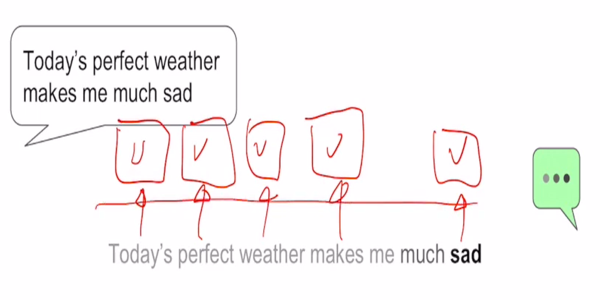

In [42]:
from PIL import Image

image = Image.open('11.png')
resize_image = image.resize((600,300))
resize_image

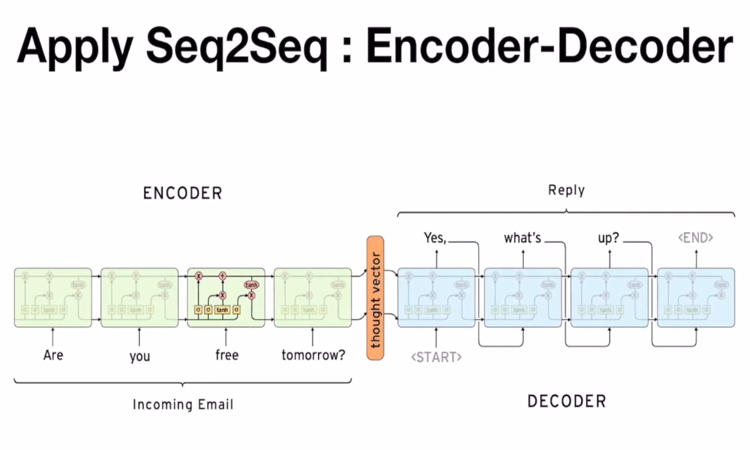

In [43]:
image = Image.open('22.png')
resize_image = image.resize((750,450))
resize_image

<br>
<br>

# 모델 생성

In [20]:
print(x_encoder.shape)
print(x_decoder.shape)
print(y_decoder.shape)

(6, 4, 41)
(6, 3, 41)
(6, 3, 41)


In [21]:
# 전체 모델 전 레이어 별로 보자면,

In [22]:
# 1. input 레이어로 시작
encoder_inputs = layers.Input(shape=(None,dic_len))
encoder_inputs

<tf.Tensor 'input_1:0' shape=(None, None, 41) dtype=float32>

In [23]:
# 2. LSTM 레이어, return_state가 없고, 있고의 차이
a  = layers.LSTM(64)(encoder_inputs) 
a

<tf.Tensor 'lstm_1/strided_slice_18:0' shape=(None, 64) dtype=float32>

In [24]:
# return_state은 output layer와 state를 동시에 보여줌
a  = layers.LSTM(64,return_state=True)(encoder_inputs)
a

[<tf.Tensor 'lstm_2/strided_slice_18:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'lstm_2/while/Identity_4:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'lstm_2/while/Identity_5:0' shape=(None, 64) dtype=float32>]

In [25]:
a[0] # output layer 출력

<tf.Tensor 'lstm_2/strided_slice_18:0' shape=(None, 64) dtype=float32>

In [26]:
a[1] # state_h 

<tf.Tensor 'lstm_2/while/Identity_4:0' shape=(None, 64) dtype=float32>

In [27]:
a[2] # state_c

<tf.Tensor 'lstm_2/while/Identity_5:0' shape=(None, 64) dtype=float32>

In [28]:
# 3. 내부상태를 디코더로 넘겨주어야 하기 때문에 인코더 마지막 layer의 hidden state, cell state를 별도로 저장

encoder_outputs, state_h, state_c = layers.LSTM(64,dropout=0.1,recurrent_dropout=0.5,return_state=True)(encoder_inputs)
encoder_states = [state_h, state_c]

# 4. 디코더 input 레이어로 시작 후 인코더 마지막 layer의 hidden state, cell state를 initial_state로 받으며 시작

## 전체 모델로 보면

In [ ]:
# 기존 파일의 dropout=0.1,recurrent_dropout=0.5 생략

### encoder

In [29]:
encoder_inputs = layers.Input(shape=(None,dic_len))
encoder_outputs, state_h, state_c = layers.LSTM(64, return_state=True)(encoder_inputs)
encoder_states = [state_h, state_c]

### decoder

In [30]:
# 디코더는 인코더의 최종 hidden state와 cell state 값을 받아 초기 상태를 초기화하고 *teacher forcing 과정을 진행하며 학습한다.

In [31]:
decoder_inputs = layers.Input(shape=(None,dic_len))
decoder_layers, _, _ = layers.LSTM(64,return_state=True,return_sequences=True)(decoder_inputs,initial_state=encoder_states)

In [32]:
decoder_outputs = layers.Dense(dic_len, activation='softmax')(decoder_layers)

In [33]:
model = models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, 41)     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, None, 41)     0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 64), (None,  27136       input_2[0][0]                    
__________________________________________________________________________________________________
lstm_5 (LSTM)                   [(None, None, 64), ( 27136       input_3[0][0]                    
                                                                 lstm_4[0][1]               

<br>
<br>

# 훈련 및 테스트

In [38]:
# 학습 방법 설정
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])    
# 훈련 시작
model.fit([x_encoder, x_decoder],y_decoder,epochs=80,batch_size=1)

Epoch 1/80
6/6 [==============================] - 1s 94ms/step - loss: 0.5081 - acc: 0.8889
Epoch 2/80
6/6 [==============================] - 0s 9ms/step - loss: 0.4613 - acc: 0.9444
Epoch 3/80
6/6 [==============================] - 0s 9ms/step - loss: 0.3952 - acc: 0.9444
Epoch 4/80
6/6 [==============================] - 0s 9ms/step - loss: 0.3624 - acc: 0.9444
Epoch 5/80
6/6 [==============================] - 0s 9ms/step - loss: 0.3519 - acc: 0.9444
Epoch 6/80
6/6 [==============================] - 0s 9ms/step - loss: 0.3292 - acc: 0.9444
Epoch 7/80
6/6 [==============================] - 0s 9ms/step - loss: 0.3201 - acc: 0.9444
Epoch 8/80
6/6 [==============================] - 0s 8ms/step - loss: 0.3072 - acc: 0.9444
Epoch 9/80
6/6 [==============================] - 0s 8ms/step - loss: 0.2935 - acc: 0.9444
Epoch 10/80
6/6 [==============================] - 0s 9ms/step - loss: 0.2721 - acc: 1.0000
Epoch 11/80
6/6 [==============================] - 0s 9ms/step - loss: 0.2586 - acc: 1.0

In [39]:
results = model.predict([x_encoder, x_decoder])
results = np.argmax(results, 2) 

In [40]:
for i in  range(len(results)) :
    decoded = [char_list[i] for i in results[i]]
    end = decoded.index('E')
    translated = ''.join(decoded[:end])
    print(translated)

사랑
얼굴
주택
희망
나무
바위


In [41]:
word_list

[['love', '사랑'],
 ['face', '얼굴'],
 ['home', '주택'],
 ['hope', '희망'],
 ['tree', '나무'],
 ['rock', '바위']]